In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random, datetime, os, shutil, math

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras.utils as image


In [3]:
# WARNING: this code is used to import dataset from kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [4]:
#WARNING: this code is used while importing dataset from kaggle
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [5]:
#WARNING: this code is used while importing dataset from kaggle
#changing the working directory
!kaggle datasets download -d lantian773030/pokemonclassification

 99% 412M/417M [00:05<00:00, 83.8MB/s]
100% 417M/417M [00:05<00:00, 74.2MB/s]


In [6]:
#WARNING: this code is used while importing dataset from kaggle
#unzipping the zip files and deleting the zip files
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: PokemonData/Golbat/78bb8cd2828f40158fc0dcd4c0366a57.jpg  
  inflating: PokemonData/Golbat/7b7a064d3a1b4c53a9be936d4e4e3bab.jpg  
  inflating: PokemonData/Golbat/7d07fd6776fb40e9986a1a0f62233325.jpg  
  inflating: PokemonData/Golbat/815b279060b94e12a6b35d434a5250c2.jpg  
  inflating: PokemonData/Golbat/818014085ff04885b31eb5e8737012f2.jpg  
  inflating: PokemonData/Golbat/87529331a47b4a5cb5d10a6b3ea46d84.jpg  
  inflating: PokemonData/Golbat/914fab74d32e49a98940d5ba7f674fa6.jpg  
  inflating: PokemonData/Golbat/949a05bd0ad44be993e5fd89a8f582df.jpg  
  inflating: PokemonData/Golbat/9a4c793b9b0042a99ebd540897f9f898.jpg  
  inflating: PokemonData/Golbat/a35b4e8e603c485cb197520af30e1208.jpg  
  inflating: PokemonData/Golbat/a45a14a67a7348bba57c06467bb73cde.jpg  
  inflating: PokemonData/Golbat/acc2b44eada74a25a64c041b2e80c453.jpg  
  inflating: PokemonData/Golbat/af30483e382240d38890dec39e083b08.jpg  
  inflating: PokemonData/G

In [7]:
#creating test dataset from the train dataset
dir_path='/content/gdrive/MyDrive/Kaggle/PokemonData'
classes = os.listdir(dir_path)

In [8]:

#for creating a train folder
os.system("mkdir /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train")

0

In [9]:
#moving all folders from root folder to train folder
os.system("mv /content/gdrive/MyDrive/Kaggle/PokemonData/* /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train/")

256

In [10]:
# Creating the test folder
os.system("mkdir /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test")


0

In [11]:
#copying all train data to test folder, in order to get same folder structure
os.system("cp -r /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train/* /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test/")

0

In [12]:
#deleting images from sub directories of test folder
os.system("find /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test/ -name '*.*' -type f -delete")

0

In [13]:
train_dir='/content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train'
test_dir='/content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test'

In [14]:
# Copying 15 random images from train folders to test folders
def prep_test_data(pokemon, train_dir, test_dir):
  pop = os.listdir(train_dir+'/'+pokemon)
  test_data=random.sample(pop, 15)
  print(test_data)
  for f in test_data:
    shutil.copy(train_dir+'/'+pokemon+'/'+f, test_dir+'/'+pokemon+'/')

In [15]:
#performing samething for each folder in train folder
for poke in os.listdir(train_dir):
  prep_test_data(poke, train_dir, test_dir)

['d1ba8548fced4b53821bfc1e0612324f.jpg', 'bd0873f54401446cacfafdac70f82cd3.jpg', 'aabb27dd7e1c4508880bd8cc1141c340.jpg', '2eb2a528f9a247358452b3c740df69a0.jpg', 'bdd70647363b47d0a97a6a9a1a7dd469.jpg', 'c9ab368481e446d685b1c1fdb42487df.jpg', 'b0b6de31451f4e7aa3411fe0963a7f4f.jpg', '1788abb8b51f48509cfac8067bd99e14.jpg', '9754fcfa5d39464785f953e7c9da73d1.jpg', '5c0ca320656b4f2fadea7aefeb80da53.jpg', '7b9859252d9346f6b3e7bc46d423c116.jpg', '86c823fe351549c7818efd6ca718556e.jpg', '34532bb006714727ade4075f0a72b92d.jpg', '95f205f244b54c00920626d669ea83e1.jpg', '3680c3f65a484c3ba05a7cb93e1d7ae3.jpg']
['d995b3fc3cbe47e4811493dd8f1c4ada.jpg', '41e07cd07e9a4d25b9ad5a9ca08f3b5e.jpg', '263b3cb088e5448e99335fbda8f73ee7.jpg', 'a1eb1fcdf2ea490aa3dc6b49a8c88fd5.jpg', 'f403dcd3136643e4b43c7d01e14494bc.jpg', '0f5ec128d07341989cb8786fec08c885.jpg', '0eab1e1f744340fa87268f2b558c7ccf.jpg', '8e1000fe38a640c2b74abc74e93eb049.jpg', '25adea61e7624a84a8fbe88d7dcbeb6e.jpg', '7fb69a33c0ca4c458812233bb4084b01.jpg'

In [16]:
target_classes = os.listdir(train_dir)
num_classes = len(target_classes)
print('Number of target classes:', num_classes)
print(list(enumerate(target_classes)))

Number of target classes: 150
[(0, 'Abra'), (1, 'Aerodactyl'), (2, 'Alakazam'), (3, 'Alolan Sandslash'), (4, 'Arbok'), (5, 'Arcanine'), (6, 'Articuno'), (7, 'Beedrill'), (8, 'Bellsprout'), (9, 'Blastoise'), (10, 'Bulbasaur'), (11, 'Butterfree'), (12, 'Caterpie'), (13, 'Chansey'), (14, 'Charizard'), (15, 'Charmander'), (16, 'Charmeleon'), (17, 'Clefable'), (18, 'Clefairy'), (19, 'Cloyster'), (20, 'Cubone'), (21, 'Dewgong'), (22, 'Diglett'), (23, 'Ditto'), (24, 'Dodrio'), (25, 'Doduo'), (26, 'Dragonair'), (27, 'Dragonite'), (28, 'Dratini'), (29, 'Drowzee'), (30, 'Dugtrio'), (31, 'Eevee'), (32, 'Ekans'), (33, 'Electabuzz'), (34, 'Electrode'), (35, 'Exeggcute'), (36, 'Exeggutor'), (37, 'Farfetchd'), (38, 'Fearow'), (39, 'Flareon'), (40, 'Gastly'), (41, 'Gengar'), (42, 'Geodude'), (43, 'Gloom'), (44, 'Golbat'), (45, 'Goldeen'), (46, 'Golduck'), (47, 'Golem'), (48, 'Graveler'), (49, 'Grimer'), (50, 'Growlithe'), (51, 'Gyarados'), (52, 'Haunter'), (53, 'Hitmonchan'), (54, 'Hitmonlee'), (55, '

In [17]:
training_set_distribution = [len(os.listdir(os.path.join(train_dir, dir))) for dir in os.listdir(train_dir)]
testing_set_distribution = [len(os.listdir(os.path.join(test_dir, dir))) for dir in os.listdir(test_dir)]

In [18]:
def show_pokemon(pokemon):
  num = len(pokemon)
  if num == 0:
    return None
  rows = int(math.sqrt(num))
  cols = (num+1)//rows
  f, axs = plt.subplots(rows, cols)
  fig = 0
  for b in pokemon:
    img = image.load_img(b)
    row = fig // cols
    col = fig % cols
    axs[row, col].imshow(img)
    fig += 1
  plt.show()

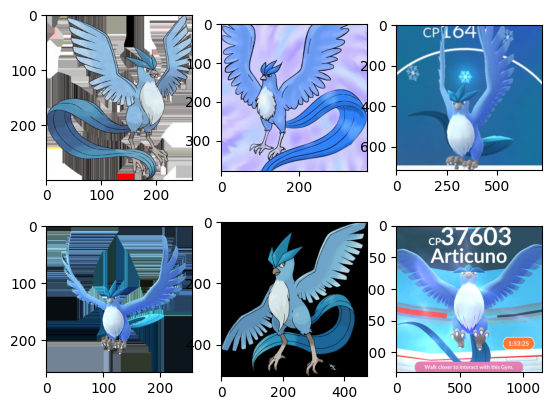

In [19]:
dir_name = os.path.join(train_dir,"Articuno")
all_images = [os.path.join(dir_name, fname) for fname in os.listdir(dir_name)]
show_pokemon(all_images[:6])

In [20]:
image_size = (184, 184, 3)
datagen=ImageDataGenerator(rescale = 1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           )

In [21]:
training_set=datagen.flow_from_directory(train_dir,
                                         target_size=image_size[:2],
                                         batch_size=32,
                                         class_mode='categorical',
                                         color_mode='rgb'
                                         )

Found 6820 images belonging to 150 classes.


In [22]:
validation_set=datagen.flow_from_directory(test_dir,
                                           target_size=image_size[:2],
                                           batch_size=32,
                                           class_mode='categorical',
                                           color_mode='rgb'
                                           )

Found 2247 images belonging to 150 classes.


In [23]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras import applications
from keras.utils import plot_model

In [24]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
filepath = "model.h5"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
rlp = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 184, 184, 184)     13984     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 92, 92, 184)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 128)       212096    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 270848)            0         
                                                                 
 dense (Dense)               (None, 150)               4

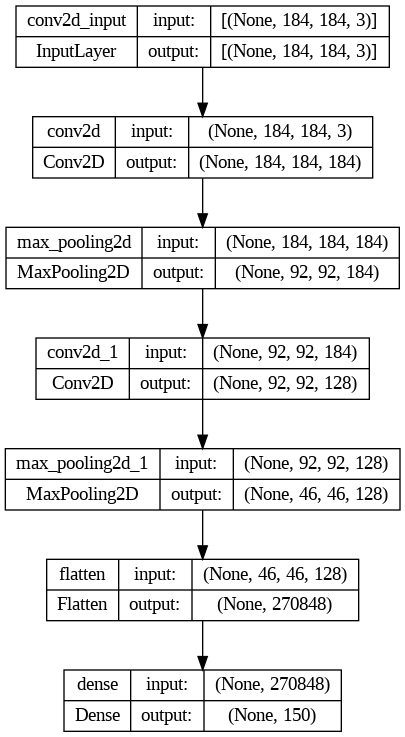

In [25]:
#defining model
def cnn(image_size, num_classes):
    classifier = Sequential()
    classifier.add(Conv2D(184, (5, 5), input_shape=image_size, activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(num_classes, activation = 'softmax'))
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return classifier

neuralnetwork_cnn = cnn(image_size, num_classes)
neuralnetwork_cnn.summary()
plot_model(neuralnetwork_cnn, show_shapes=True)

In [26]:
history = neuralnetwork_cnn.fit_generator(
    generator=training_set, validation_data=validation_set,
    callbacks=[es, ckpt, rlp], epochs = 50,
)

<ipython-input-26-c02e5885e615>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = neuralnetwork_cnn.fit_generator(


Epoch 1/50
214/214 [==============================] - ETA: 0s - loss: 5.1344 - acc: 0.0089
Epoch 1: loss improved from inf to 5.13438, saving model to model.h5
214/214 [==============================] - 140s 588ms/step - loss: 5.1344 - acc: 0.0089 - val_loss: 5.0056 - val_acc: 0.0129 - lr: 0.0010
Epoch 2/50
214/214 [==============================] - ETA: 0s - loss: 4.9623 - acc: 0.0221
Epoch 2: loss improved from 5.13438 to 4.96226, saving model to model.h5
214/214 [==============================] - 123s 574ms/step - loss: 4.9623 - acc: 0.0221 - val_loss: 4.8765 - val_acc: 0.0396 - lr: 0.0010
Epoch 3/50
214/214 [==============================] - ETA: 0s - loss: 4.7381 - acc: 0.0670
Epoch 3: loss improved from 4.96226 to 4.73809, saving model to model.h5
214/214 [==============================] - 137s 640ms/step - loss: 4.7381 - acc: 0.0670 - val_loss: 4.5350 - val_acc: 0.0908 - lr: 0.0010
Epoch 4/50
214/214 [==============================] - ETA: 0s - loss: 4.3605 - acc: 0.1130
Epoch 4

<Axes: >

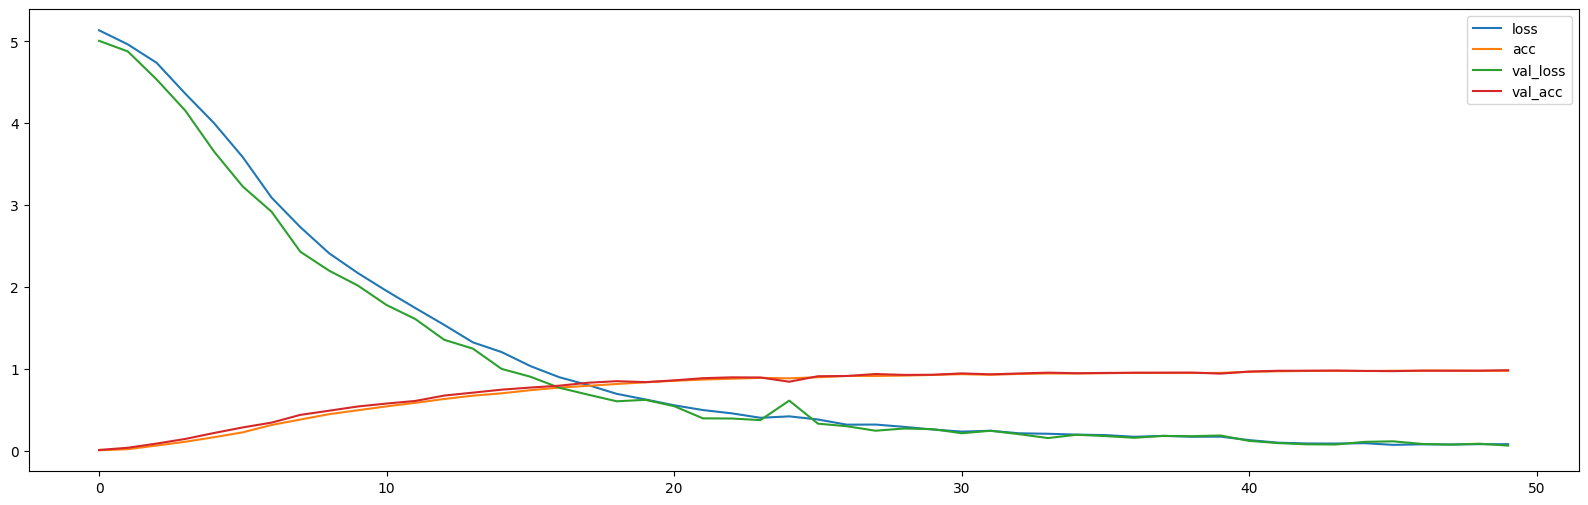

In [27]:
fig, ax = plt.subplots(figsize=(20, 6))
pd.DataFrame(history.history).iloc[:, :-1].plot(ax=ax)

In [28]:
from keras.models import load_model
import tensorflow as tf

model = load_model("model.h5")


converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

print("model converted")

# Save the model.
with open('model_184.tflite', 'wb') as f:
  f.write(tflite_model)


model converted
